In [1]:
import tensorflow
import matplotlib.pyplot as plt
import sklearn
import pandas
import numpy
import json
import os
import PIL
import time
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from datetime import datetime
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image

In [2]:
image_width = 128
image_height = 128
image_channels = 3

In [3]:
os.system('rm -rf humans/train/no')
os.system('rm -rf humans/validation/no')
os.system('mkdir humans/train/no')
os.system('mkdir humans/validation/no')

files = os.listdir('humans/data/raw')

for i in tqdm(range(len(files))):
    if files[i].split('.')[1] != 'jpg': 
        continue
    else:
        image = Image.open('humans/data/raw/' + files[i])
        image = image.crop((0, 0, image_width, image_height))
        image.save('humans/train/no/image_' + str(i) + '.jpg')
        image.save('humans/validation/no/image_' + str(i) + '.jpg')

  0%|          | 0/4319 [00:00<?, ?it/s]

De gebruikte afbeeldingen zijn 128x128 met 3 kleur kanalen (RGB)

In [4]:
batch_size = 4
epochs = 10

In [5]:
model = tensorflow.keras.Sequential()

In [6]:
model.add(Rescaling(1./255, input_shape=(image_height, image_width, 3)))

In [7]:
model.add(Conv2D(32, (3,3), input_shape = (image_width, image_height, image_channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [8]:
model.add(Conv2D(32, (3,3), input_shape = (image_width, image_height, image_channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [9]:
model.add(Flatten())
model.add(Dense(64))

In [10]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

Een custom callback om inzichtelijk te maken hoe het trainen werkt

In [12]:
class CustomCallback(tensorflow.keras.callbacks.Callback):
    
    def on_train_begin(self, logs = None):
        print("Starting training")
        
    def on_train_end(self, logs = None):
        print("Stopped training")
        
    def on_epoch_begin(self, epoch, logs = None):
        print("Epoch begin")
        
    def on_epoch_end(self, epoch, logs = None):
        print(logs)
        os.system('echo ' + json.dumps(logs) + ' > progess.json')
        print("Epoch end")
    
    def on_test_begin(self, logs = None):
        #print("Test start")
        pass
        
    def on_test_end(self, logs = None):
        #print("Test end")
        pass
        
    def on_predict_begin(self, logs = None):
        print("Predicting")
        
    def on_predict_end(self, logs = None):
        print("End predicting")
    
    def on_train_batch_begin(self, batch, logs=None):
        #print("Train batch begin")
        pass

    def on_train_batch_end(self, batch, logs=None):
        #print("Train batch end")
        pass

    def on_test_batch_begin(self, batch, logs=None):
        #print("Test batch begin")
        pass

    def on_test_batch_end(self, batch, logs=None):
        #print("Test batch end")
        pass

    def on_predict_batch_begin(self, batch, logs=None):
        print("Predict batch begin")

    def on_predict_batch_end(self, batch, logs=None):
        print("Predict batch end")

De datasets worden uit de train- en validatie mappen gehaald. Hierbij wordt een gedeelte van de data gebruikt per epoch om het trainen te versnellen 

In [13]:
train_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
  "./humans/train/",
  validation_split = 0.8,
  subset = "training",
  seed = 123,
  image_size = (image_height, image_width),
  batch_size = batch_size)

validation_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
  "./humans/validation/",
  validation_split = 0.8,
  subset = "validation",
  seed = 123,
  image_size = (image_height, image_width),
  batch_size = batch_size)


Found 6341 files belonging to 2 classes.
Using 1269 files for training.
Found 6341 files belonging to 2 classes.
Using 5072 files for validation.


In [14]:
history = model.fit(
  train_dataset,
  validation_data = validation_dataset,
  epochs = epochs,
  callbacks = [CustomCallback()],
)
model.save("humansnenvironment")

Starting training
Epoch 1/10
Epoch begin
318/318 [==============================] - 178s 552ms/step - loss: 0.8299 - accuracy: 0.8224 - val_loss: 0.0806 - val_accuracy: 0.9724
{'loss': 0.3755149841308594, 'accuracy': 0.8975571393966675, 'val_loss': 0.08061013370752335, 'val_accuracy': 0.9723974466323853}
Epoch end
Epoch 2/10
Epoch begin
318/318 [==============================] - 75s 236ms/step - loss: 0.0610 - accuracy: 0.9849 - val_loss: 0.0564 - val_accuracy: 0.9864
{'loss': 0.06656642258167267, 'accuracy': 0.985027551651001, 'val_loss': 0.056400347501039505, 'val_accuracy': 0.9863958954811096}
Epoch end
Epoch 3/10
Epoch begin
318/318 [==============================] - 75s 235ms/step - loss: 0.0957 - accuracy: 0.9912 - val_loss: 0.0281 - val_accuracy: 0.9939
{'loss': 0.10489022731781006, 'accuracy': 0.9913317561149597, 'val_loss': 0.0280898604542017, 'val_accuracy': 0.9938880205154419}
Epoch end
Epoch 4/10
Epoch begin
318/318 [==============================] - 74s 233ms/step - loss: 

In [15]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

In [16]:
epochs_range = range(epochs)

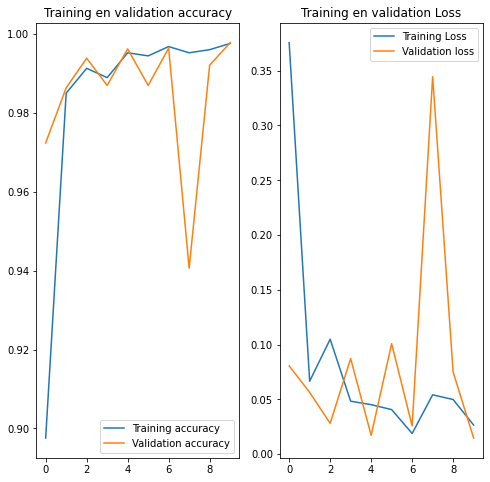

In [17]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label = 'Training accuracy')
plt.plot(epochs_range, validation_accuracy, label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training en validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, validation_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training en validation Loss')
plt.show()

In [45]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

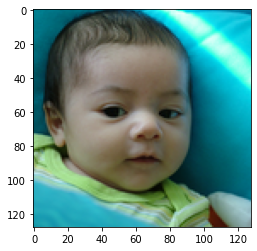

0.0


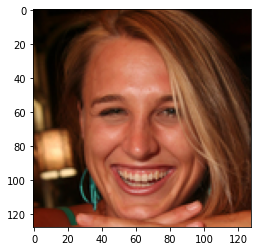

1.0


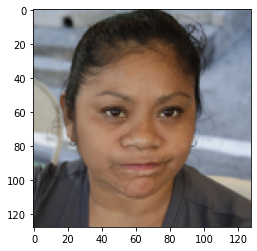

0.19


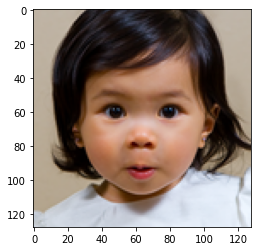

1.0


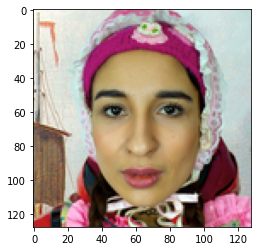

1.0


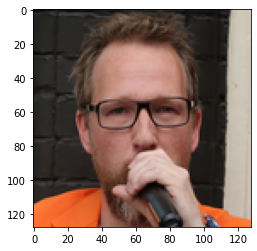

0.62


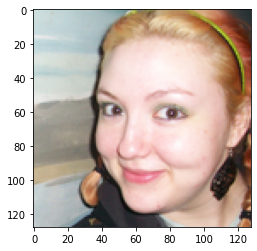

1.0


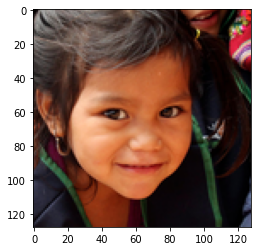

0.0


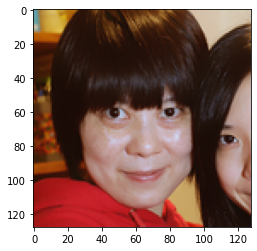

1.0


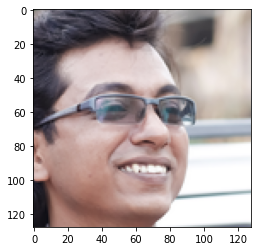

1.0


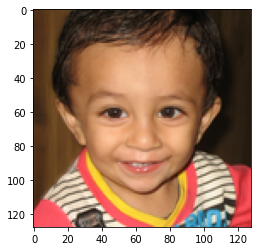

1.0


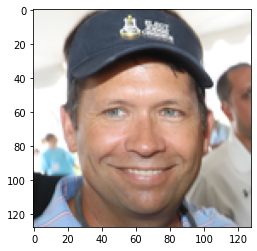

1.0


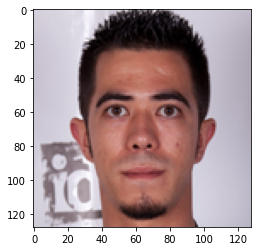

1.0


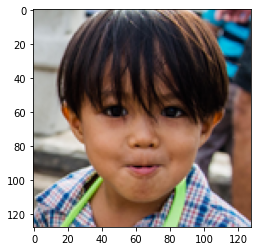

0.99


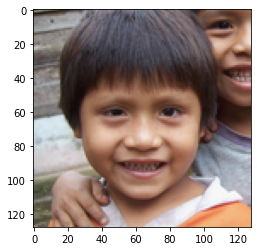

0.99


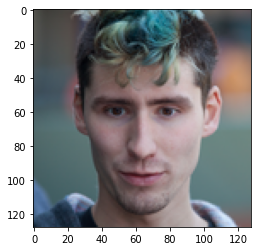

1.0


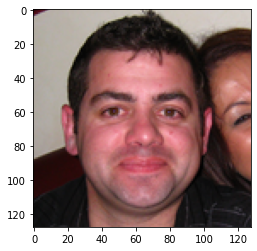

1.0


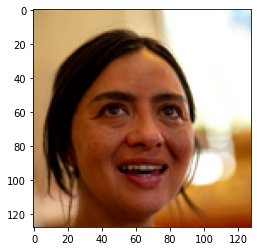

0.0


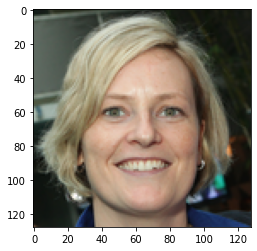

1.0


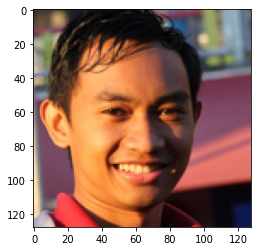

0.0


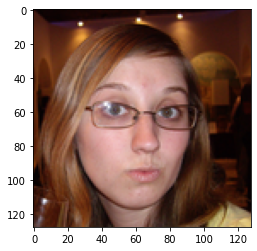

1.0


In [47]:
images = ['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png']

for image in images:
    img = mpimg.imread('humans/train/yes/' + image)
    imgplot = plt.imshow(img)
    plt.show()
    model1 = tensorflow.keras.models.load_model("humansnfaces")
    img = tensorflow.keras.preprocessing.image.load_img('humans/train/yes/' + image, target_size=(128, 128))

    x = tensorflow.keras.preprocessing.image.img_to_array(img)
    x = numpy.expand_dims(x, axis=0)
    x = preprocess_input(x)

    predict = model1.predict(x)
    print(str(round(predict[0][0], 2)))